Firstly, we include all the imports necessary for carrying out the desired operations specified in the objectives of the mini-project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using Pandas, we will read the .csv file.

In [2]:
games=pd.read_csv('appstore_games (5).csv')

Let us see the 'head()' of the table (first 5 rows)

In [66]:
games.columns

Index(['ID', 'Name', 'Subtitle', 'Average User Rating', 'User Rating Count',
       'Price', 'In-app Purchases', 'Developer', 'Age Rating', 'Languages',
       'Genres', 'Current Version Release Date', 'Original Release Date',
       'DIFF', 'Grouped Genres', 'Total In-App Purchases', 'Sizes'],
      dtype='object')

In [3]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


We will now remove those columns which would have little/no impact on what conclusions we are trying to achieve in this mini-project, such as 'URL','Icon URL' and 'Description'('axis=1' meaning column-wise)

In [4]:
games.drop(['URL','Icon URL','Description'],axis=1,inplace=True)

To check whether the afore-mentioned columns have been dropped:

In [5]:
games.head()

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


For our own convenience, the 'day' part of some of the dates in the 'Original Release Date' and Current Version Release Date' columns are in the form of a single digit, example: the date for 'Current Version Release Date' for index 2 is 5, hence, I wish to convert such dates to double-digits, which would become '05'. Let us take that date itself as an example:'5/09/2017', for which the first '/' is at index 1. When that condition is satisfied, we add '0' to it and add the date altogether as an element in a list 'ml1'. 

In [6]:
ml1=[]
def myfunc(var):
    if(var.index('/')==1):
        ml1.append('0'+var)
    else:
        ml1.append(var)

We will now apply the above function to the 'Current Version Release Date' column, by which we will get the list of dates.

In [7]:
games['Current Version Release Date'].apply(lambda x: myfunc(x))

0        None
1        None
2        None
3        None
4        None
         ... 
17002    None
17003    None
17004    None
17005    None
17006    None
Name: Current Version Release Date, Length: 17007, dtype: object

We create a new column 'New CVRD' which would contain the elements of the list ml1 (dates).

In [8]:
games['New CVRD']=ml1

We do the same for 'Original Release Date' column.

In [9]:
ml1=[]
def myfunc(var):
    if(var.index('/')==1):
        ml1.append('0'+var)
    else:
        ml1.append(var)

In [10]:
games['Original Release Date'].apply(lambda x:myfunc(x))

0        None
1        None
2        None
3        None
4        None
         ... 
17002    None
17003    None
17004    None
17005    None
17006    None
Name: Original Release Date, Length: 17007, dtype: object

In [11]:
games['New ORD']=ml1

We will now drop the original dates' columns

In [12]:
games.drop(['Original Release Date','Current Version Release Date'],axis=1,inplace=True)

Now check to see the new columns added, i.e., 'New CVRD','New ORD'

In [13]:
games.head(3)

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,New CVRD,New ORD
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",30/05/2017,11/07/2008
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",17/05/2018,11/07/2008
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",05/09/2017,11/07/2008


We will now rename the new columns to the original dates' columns titles

In [14]:
games.rename(columns={'New CVRD':'Current Version Release Date','New ORD':'Original Release Date'},inplace=True)

We will now form a function which would convert the dates (in str format) to the date format by using the Pandas library's method .to_datetime().

In [15]:
def myfunc(var):
    return pd.to_datetime(var)

In [16]:
games['New CVRD']=games['Current Version Release Date'].apply(lambda x: myfunc(x))

C:\Users\kmohammed2\AppData\Local\Temp\ipykernel_65904\145575450.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(var)


In [17]:
games['New ORD']=games['Original Release Date'].apply(lambda x: myfunc(x))

C:\Users\kmohammed2\AppData\Local\Temp\ipykernel_65904\145575450.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(var)


We now drop the columns which contain dates in str format.

In [18]:
games.drop(['Current Version Release Date','Original Release Date'],axis=1,inplace=True)

And rename the new columns to the original names.

In [19]:
games.rename(columns={'New CVRD':'Current Version Release Date','New ORD':'Original Release Date'},inplace=True)

In [20]:
games.head(1)

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Current Version Release Date,Original Release Date
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2017-05-30,2008-11-07


As per the first 'Data Cleaning' objective specified in the email, we will remove the games which have no user ratings.

In [21]:
games = games.dropna(subset=['User Rating Count'])

Now we observe that the rows have been drastically reduced, which can be checked by using .shape, previously there were around 17,000 rows.

In [22]:
games.shape

(7561, 15)

As per the second objective, we remove the null values

In [23]:
games=games.dropna()

In [24]:
games.shape

(1935, 15)

As per the third objective, games with less than 200 user ratings AND days since last update date < 6 months should be dropped to prevent biased ratings from the developer. This can be done by the following commands:

In [25]:
games['DIFF']=(((games['Current Version Release Date']-games['Original Release Date'])/np.timedelta64(1,'M')))

In [26]:
games['DIFF']=games['DIFF'].astype(int)

In [27]:
games=games.dropna(subset=['User Rating Count'])

Now we perform filtering to follow the objective conditions mentioned above

In [28]:
games=games[(games['User Rating Count']>=200) & (games['DIFF']>6)]

In [29]:
games.shape

(753, 16)

As per the fourth objective, the genre tags 'Entertainment' and 'Games' should be removed from the Genre string, but since in our table the genre orders in each cell of the Genre column are not in a fixed order, for example: 'Strategy, Puzzle'(in one cell),'Board,Strategy'(in another cell), we will replace different variations of them with ''.

In [30]:
games['Genres']=games['Genres'].str.replace('Games, ','')

In [31]:
games['Genres']=games['Genres'].str.replace('Entertainment','')
games['Genres']=games['Genres'].str.replace('Games','')
games['Genres']=games['Genres'].str.replace('Strategy','')

After the replacements performed above, there would be commas and unnecessary spaces left in the genre column cells, for which, the replacements below are carried out:

In [32]:
games['Genres']=games['Genres'].str.replace(', ,','')
games['Genres']=games['Genres'].str.replace(', ','')

There are many apps which have 'Strategy' in the genre column cells (in addition with other genre terms), so in order to narrow down the games which are ONLY strategic, we will replace 'Strategy' with ''.

In [33]:
games['Genres']=games['Genres'].str.replace('Strategy','')

We will now categorize the genres and create a new column for it.

In [34]:
ml2=[]
def myfunc(var):
    if(('Puzzle' in var)|('Board' in var)):
        ml2.append('Puzzle')
    elif(('Adventure' in var)|('Role' in var)|('Role Playing' in var)|('Racing' in var)):
        ml2.append('Adventure')
    elif('Action' in var):
        ml2.append('Action')
    elif(('Family' in var)|('Education' in var)):
        ml2.append('Family')
    elif(('Utilities' in var)|('Lifestyle' in var)):
        ml2.append('Lifestyle')
    elif('Casual' in var):
        ml2.append('Casual')
    elif('Simulation' in var):
        ml2.append('Simulation')
    elif(var == ''):
        ml2.append('Purely strategic')
    elif(('Card' in var)|('Sports' in var)):
        ml2.append('Card Games')
    elif(('Music' in var)|('Trivia' in var)):
        ml2.append('Interests')
    elif('Casino' in var):
        ml2.append('Casino')

In [35]:
games['Genres'].apply(lambda x:myfunc(x))

19       None
75       None
90       None
106      None
118      None
         ... 
15514    None
15555    None
15611    None
15630    None
15977    None
Name: Genres, Length: 753, dtype: object

In [36]:
games['Grouped Genres']=ml2

We can remove the 'Primary Genre' column as it does not have much effect on what we are trying to achieve

In [37]:
games.drop('Primary Genre',axis=1,inplace=True)

In [38]:
games.head(1)

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Genres,Current Version Release Date,Original Release Date,DIFF,Grouped Genres
19,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",3.5,357.0,0.0,"0.99, 0.99, 0.99",Splash Software Ltd.,4+,EN,52236288.0,Puzzle,2019-04-26,2008-09-24,124,Puzzle


We now need to, for each game, add up the in-app purchases and create a new column for it. We do so by accessing each cell comprising of the in-app purchases of each game, split them with the help of comma (,), add them to a list l1, convert each element to float format(which was initially in str format), and add the sum of those elements to a list 'lel'(all of this was just for the in-app purchases of one game, this will be applied to each game),and round them to 3 digit places.

In [39]:
lel=[]
def myfunc(var):
    l1=var.split(',')
    for j in range(0,len(l1)):
        l1[j]=float(l1[j])
    print(sum(l1))
    lel.append(round(sum(l1),3))

In [40]:
games['In-app Purchases'].apply(lambda x: myfunc(x))

2.9699999999999998
2.9699999999999998
267.90000000000003
21.91
59.959999999999994
207.91000000000003
206.94
8.91
23.949999999999996
24.9
79.89999999999999
7.970000000000001
27.43
0.99
109.96000000000001
7.970000000000001
0.99
1.99
21.91
75.89999999999999
208.92000000000002
4.97
5.95
2.49
91.95
12.96
9.97
55.910000000000004
75.9
26.91999999999999
23.949999999999996
1.98
0.99
168.94
0.99
2.99
3.9800000000000004
126.89999999999999
340.90000000000003
0.99
17.96
51.900000000000006
240.90000000000003
0.99
8.99
0.99
0.99
35.96
29.900000000000006
8.940000000000001
6.96
192.94
19.97
22.91
75.89999999999999
124.9
7.960000000000001
33.9
2.9699999999999998
127.91
1.98
24.97
8.99
7.470000000000001
66.9
18.909999999999997
37.90000000000001
66.9
35.900000000000006
190.91000000000003
19.9
3.98
1.99
114.9
2.9699999999999998
69.88000000000001
34.90000000000001
45.90000000000001
10.96
181.90000000000003
146.9
150.9
7.96
113.9
7.960000000000001
15.940000000000001
39.90000000000001
3.99
20.900000000000002


19       None
75       None
90       None
106      None
118      None
         ... 
15514    None
15555    None
15611    None
15630    None
15977    None
Name: In-app Purchases, Length: 753, dtype: object

To see what a few elements of the list 'lel' look like:

In [41]:
lel[0:3]

[2.97, 2.97, 267.9]

In [42]:
games['Total In-App Purchases']=lel

As we can see below, a new column 'Total In-App Purchases' has been added.

In [43]:
games.head(1)

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Genres,Current Version Release Date,Original Release Date,DIFF,Grouped Genres,Total In-App Purchases
19,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",3.5,357.0,0.0,"0.99, 0.99, 0.99",Splash Software Ltd.,4+,EN,52236288.0,Puzzle,2019-04-26,2008-09-24,124,Puzzle,2.97


We would now want to see the average user ratings of different genres, for which we create a dataframe 'gf2' comprising of the grouped genres along with their corresponding average user ratings

In [46]:
games.dtypes

ID                                       int64
Name                                    object
Subtitle                                object
Average User Rating                    float64
User Rating Count                      float64
Price                                  float64
In-app Purchases                        object
Developer                               object
Age Rating                              object
Languages                               object
Size                                   float64
Genres                                  object
Current Version Release Date    datetime64[ns]
Original Release Date           datetime64[ns]
DIFF                                     int32
Grouped Genres                          object
Total In-App Purchases                 float64
dtype: object

In [48]:
games_numeric = games[games['Grouped Genres'].str.isnumeric()]
gf2=games_numeric.groupby('Grouped Genres').mean()['Average User Rating']

As observed above, we see that 'Purely Strategic' apps have the highest average user ratings among all the other genres. This can be represented by means of a barplot which can be plotted by with the help of the 'seaborn' visualization library

<Axes: xlabel='Grouped Genres', ylabel='Average User Rating'>

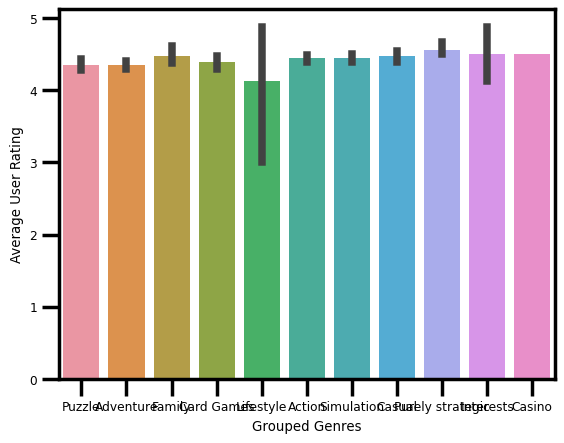

In [49]:
sns.set_context('poster',font_scale=0.4)
sns.barplot(x='Grouped Genres',y='Average User Rating',data=games)

We will now modify gf2 to consist of 1 categorical column and 3 numeric columns:

In [50]:
gf2=games[['Grouped Genres','Total In-App Purchases','Size','Average User Rating']]

To be able to state clearly the effect that the size of the app has on the average user rating, we perform correlation as follows:

In [51]:
gf2.corr()

ValueError: could not convert string to float: 'Puzzle'

As observed above, the correlation between size and average user rating is -0.009, meaning it can be classified under weak negative correlation, in our case, implying that the increase in the size of the app has VERY little effect on the average user ratings. This could be demonstrated with a pairplot:

C:\Users\kmohammed2\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


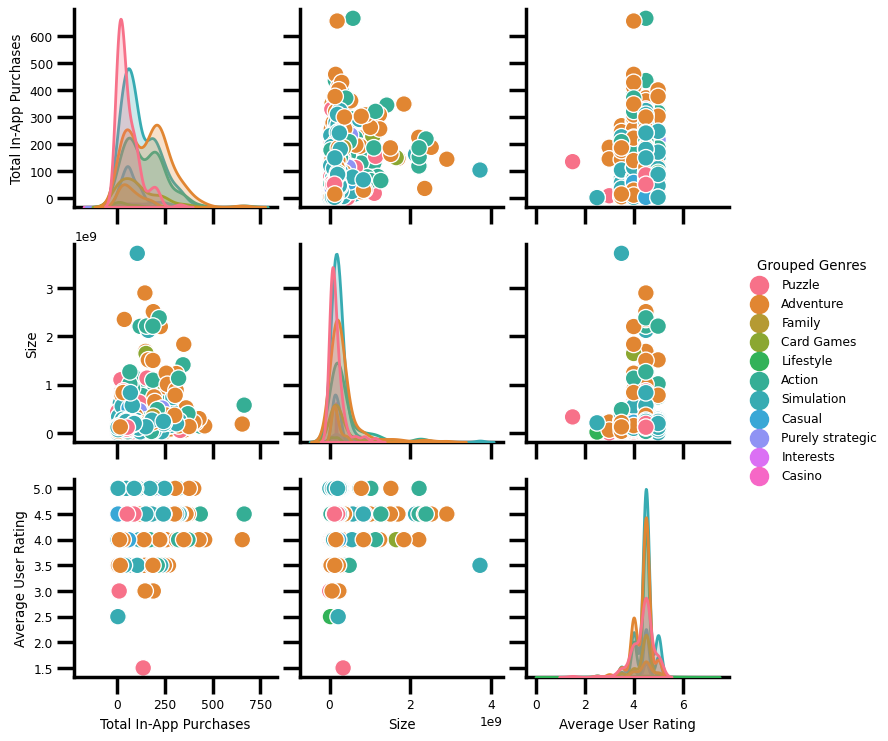

In [52]:
sns.pairplot(gf2,hue='Grouped Genres')

The same statement could go for determining the effect of total-in-app purchases on the average user ratings.

Conclusion:
1. The apps of the genre 'Purely Strategic' have higher average user ratings (4.55) among all other genres, followed by 'Interests' and 'Casino' at second place (each having 4.50 avg user rating)
2. The increase in the size of an app has very little effect on the average user ratings.
3. The increase in in-app purchases has very little effect on the average user ratings.

In [54]:
gf2=games_numeric.groupby('Grouped Genres').mean()['Average User Rating']

In [55]:
gf2.round()

Series([], Name: Average User Rating, dtype: float64)

If we round off the original average user ratings of the different genres, we shall get the above float numbers, thereby clearly indicating that the 'Purely Strategic' apps have an edge over the other genres of apps when it comes to having higher average user ratings.

The function below is to be applied to the 'Size' column (initially given in bytes) to be converted to MBs.

In [56]:
def mymul(var):
    return round(var*0.000001,2)

We add new column called 'Sizes' which contains the sizes in MBs. We then delete the initial 'Size' column which contained sizes in bytes.

In [57]:
games['Sizes']=games['Size'].apply(lambda x: mymul(x))

In [58]:
games.drop('Size',axis=1,inplace=True)

In [59]:
games.head(1)

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Genres,Current Version Release Date,Original Release Date,DIFF,Grouped Genres,Total In-App Purchases,Sizes
19,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",3.5,357.0,0.0,"0.99, 0.99, 0.99",Splash Software Ltd.,4+,EN,Puzzle,2019-04-26,2008-09-24,124,Puzzle,2.97,52.24


Just for our information's sake, we check the number of games of each genre in the appstore using countplot.

<Axes: xlabel='Grouped Genres', ylabel='count'>

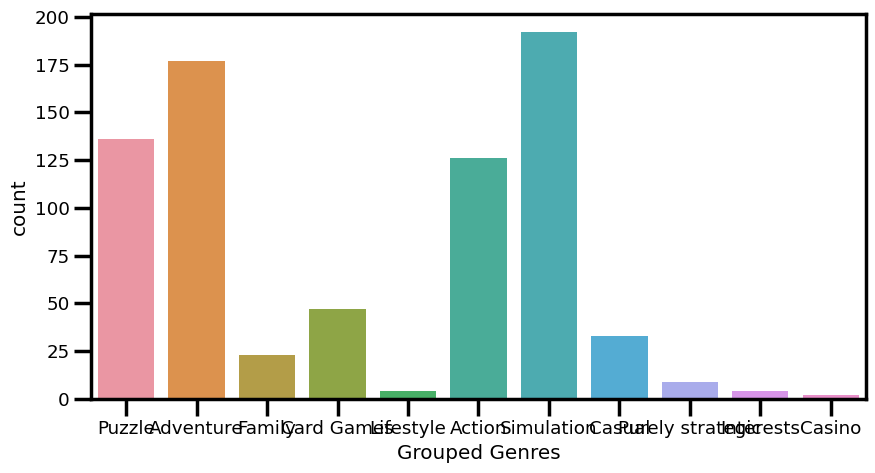

In [60]:
plt.figure(figsize=(10,5))
sns.set_context('poster',font_scale=0.6)
sns.countplot(x='Grouped Genres',data=games)

In [61]:
games.head(1)

,ID,Name,Subtitle,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Genres,Current Version Release Date,Original Release Date,DIFF,Grouped Genres,Total In-App Purchases,Sizes
19,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",3.5,357.0,0.0,"0.99, 0.99, 0.99",Splash Software Ltd.,4+,EN,Puzzle,2019-04-26,2008-09-24,124,Puzzle,2.97,52.24


Here we see the total in-app purchases grouped by genres.

<Axes: xlabel='Grouped Genres', ylabel='Total In-App Purchases'>

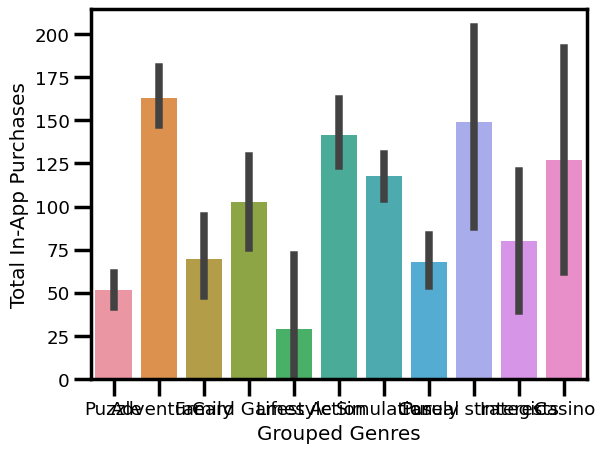

In [62]:
sns.barplot(x='Grouped Genres',y='Total In-App Purchases',data=games)

In an attempt to examine the in-app purchases of different genres using stripplot, we find that we are not able to clearly identify the limits of in-app purchases of different genres as majority of them are over-lapping.

<Axes: xlabel='Average User Rating', ylabel='Total In-App Purchases'>

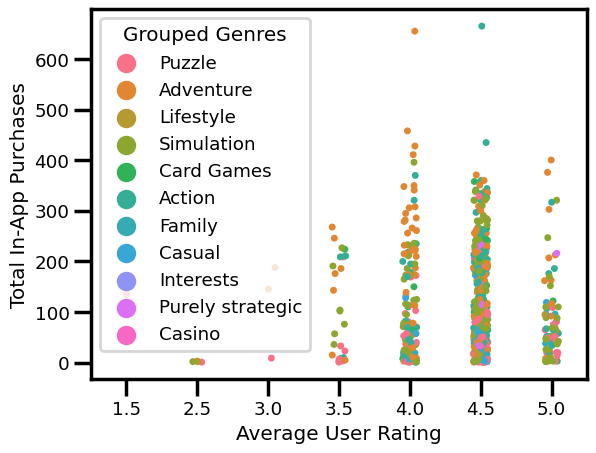

In [63]:
sns.stripplot(x='Average User Rating',y='Total In-App Purchases',data=games,hue='Grouped Genres')

In order to be able to clearly examine the in-app purchases of different genres using scatterplot, we use seaborn library's FacetGrid plot, thus making it much easier for us to note down our observations. In the outputs of the following 2 cells, you will be able to observe the effect of the 'Total In-App Purchases' and 'Sizes' respectively, on the average user ratings of different genres.

C:\Users\kmohammed2\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


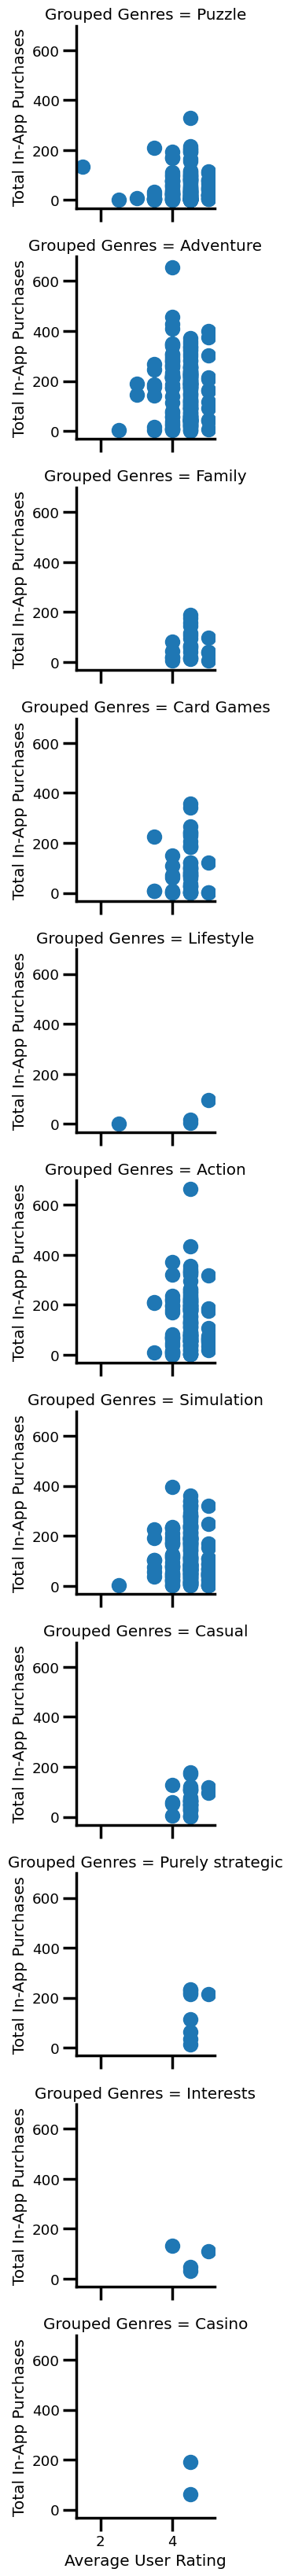

In [64]:
g=sns.FacetGrid(data=games,row='Grouped Genres')
g.map(plt.scatter,'Average User Rating','Total In-App Purchases')

C:\Users\kmohammed2\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


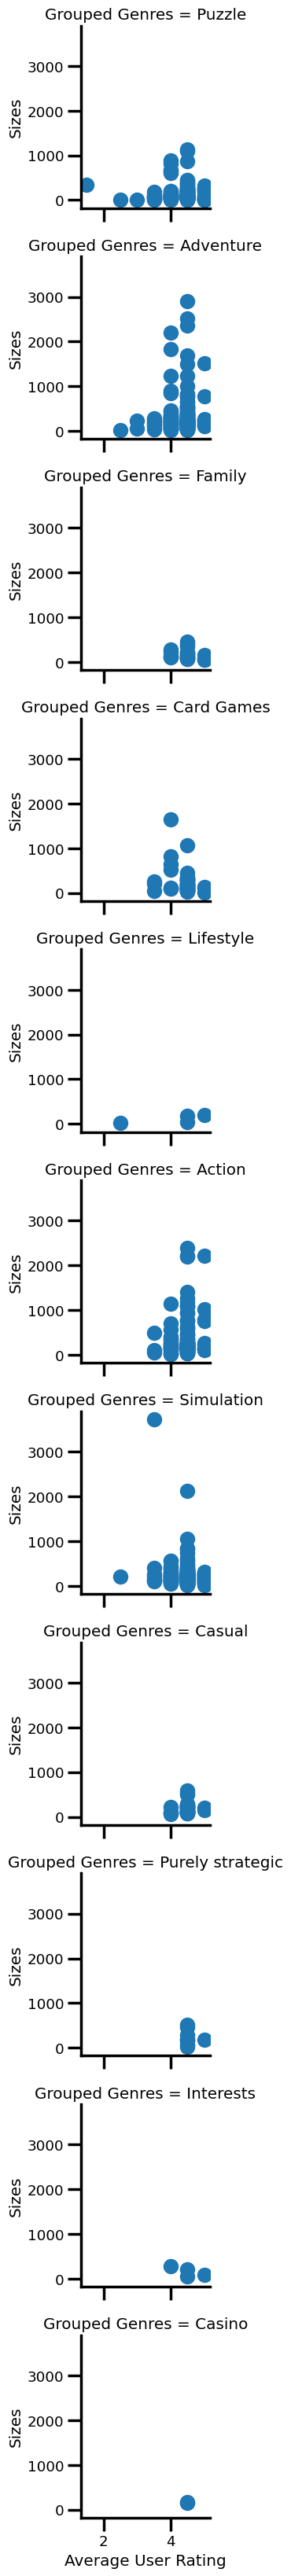

In [65]:
g=sns.FacetGrid(data=games,row='Grouped Genres')
g.map(plt.scatter,'Average User Rating','Sizes')

The main aim of this mini-project was not to just simply see which genres of apps have higher average user ratings, it was to see what would be the best combination strategy a developer could apply when developing an app of a particular genre. Example: If the developer wishes to develop an app of the 'Family' genre, in order to get user ratings of 4-and-above, he/she must include in-app-purchases in the range x-to-y and make sure that the size of the game is in the range a-to-b MBs.

From the above plots, the following inferences regarding the combination strategy of different genres can be made:
1. Puzzle: TIAP(Total In-App-Purchases): Minimum- 0 USD; Maximum- Around 340 USD
           SIZE: Maximum- Around 1300 MB (1.3 GB)
2. Adventure: TIAP: Minimum- 0 USD; Maximum- 680 USD
              SIZE: Maximum- 2900-3000 MB (2.9-3 GB)
3. Family: TIAP: Minimum- 0 USD; Maximum- 200 USD
           SIZE: Maximum- 500 MB
4. Card Games: TIAP: Minimum- 0 USD; Maximum- 380 USD
               SIZE: Maximum- 1600-1700 MB (1.6-1.7 GB)
5. Lifestyle: TIAP: Minimum- 0 USD; Maximum- 100 USD
              SIZE: Maximum- 200 MB
6. Action: TIAP: Minimum- 0 USD; Maximum- 680 USD
                 SIZE: Maximum- 2450 MB (2.45 GB)
7. Simulation: TIAP: Minimum- 0 USD; Maximum- 400 USD
               SIZE: Maximum- 2200 MB (2.2 GB)
8. Casual: TIAP: Minimum- 0 USD; Maximum- 180-190 USD
           SIZE: Maximum- 700 MB (0.7 GB)
9. Purely Strategic: TIAP: Minimum- 0 USD; Maximum- 260 USD
                     SIZE: Maximum- 700 MB (0.7 GB)
10. Interests: TIAP: Minimum- 0 USD; Maximum- 150 USD
               SIZE: Maximum- 300-400 MB (0.3-0.4 GB)
11. Casino: TIAP: Minimum- 50 USD; Maximum- 200 USD
            SIZE: Maximum- 200 MB (0.2 GB)